In [5]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pandas as pd
import numpy as np

In [2]:
x, y = make_classification(n_samples=1000, n_classes=2, weights=[0.7, 0.3], n_features=10, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

**Random Forest Feature Importance**

In [3]:
# Random Forest feature importance
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

# Mean decrease impurity
importance_df = pd.DataFrame({
    'feature': [f"feature_{i}" for i in range(x_train.shape[1])],
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("Random Forest Feature Importance:")
print(importance_df)

Random Forest Feature Importance:
     feature  importance
6  feature_6    0.382438
2  feature_2    0.214366
8  feature_8    0.120637
0  feature_0    0.108631
5  feature_5    0.034819
7  feature_7    0.030252
1  feature_1    0.028861
3  feature_3    0.028341
4  feature_4    0.027337
9  feature_9    0.024317


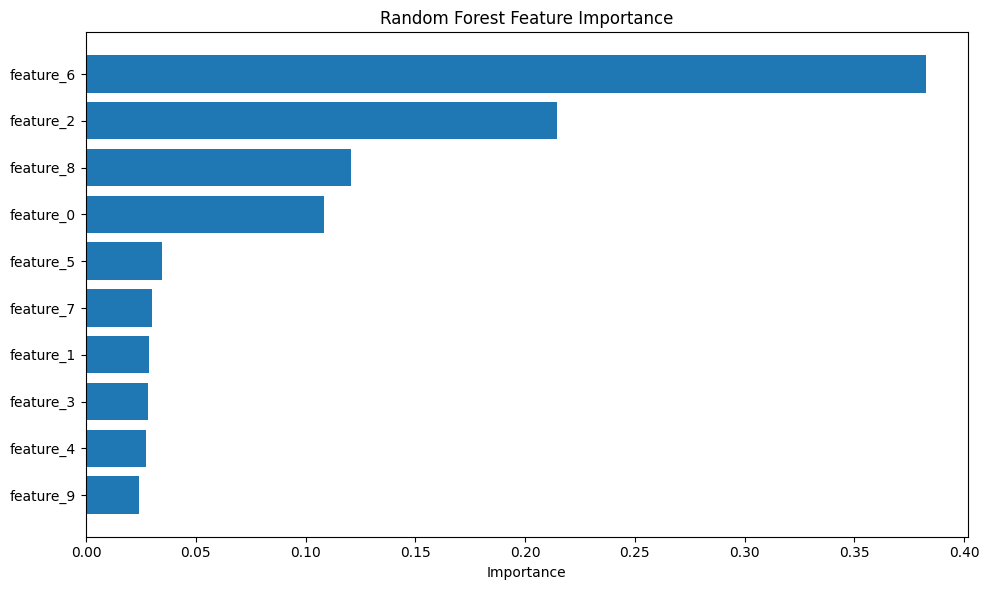

In [4]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.title('Random Forest Feature Importance')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

**Permutation Importance**

In [6]:
perm_importance = permutation_importance(
    rf, x_test, y_test,
    n_repeats=10,
    random_state=42,
    scoring='accuracy'
)

perm_df = pd.DataFrame({
    'feature': [f"feature_{i}" for i in range(x_train.shape[1])],
    'importance_mean': perm_importance.importances_mean,
    'importance_std': perm_importance.importances_std
}).sort_values('importance_mean', ascending=False)

print("\nPermutation Importance:")
print(perm_df)


Permutation Importance:
     feature  importance_mean  importance_std
6  feature_6           0.3330        0.031161
8  feature_8           0.0740        0.014629
0  feature_0           0.0190        0.012610
2  feature_2           0.0135        0.006727
7  feature_7           0.0115        0.006344
4  feature_4           0.0115        0.004500
5  feature_5           0.0115        0.004500
1  feature_1           0.0090        0.004359
9  feature_9           0.0065        0.004500
3  feature_3           0.0005        0.003500


**XGBoost Feature Importance**

In [7]:
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(x_train, y_train)
    
# Different importance types
importance_types = ['weight', 'gain', 'cover']
    
for imp_type in importance_types:
    importance = xgb_model.get_booster().get_score(importance_type=imp_type)
    print(f"\nXGBoost Importance ({imp_type}):")
    for feature, score in sorted(importance.items(), key=lambda x: x[1], reverse=True)[:5]:
        print(f"  {feature}: {score:.3f}")


XGBoost Importance (weight):
  f8: 163.000
  f6: 115.000
  f9: 104.000
  f5: 92.000
  f3: 78.000

XGBoost Importance (gain):
  f6: 9.751
  f8: 2.139
  f0: 0.871
  f5: 0.781
  f1: 0.653

XGBoost Importance (cover):
  f6: 24.358
  f8: 11.858
  f0: 10.743
  f3: 8.716
  f2: 7.406
